In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import datetime as dt
import numpy as np
from scipy.stats import linregress

# Assign Data File Locations
cobra_09_path = "data/COBRA-2009-2019.csv"
cobra_20_path = "data/COBRA-2020.csv"
cobra_20_Old_path = "data/COBRA-2020-Old.csv"
cobra_21_path = "data/COBRA-2021.csv"
weather_data_path = "data/weather_data.csv"
county_cases_path = "data/county_cases.csv"

# Read the data files into dataframes
cobra_09 = pd.read_csv(cobra_09_path, low_memory=False)
cobra_20 = pd.read_csv(cobra_20_path)
cobra_20_Old = pd.read_csv(cobra_20_Old_path)
cobra_21 = pd.read_csv(cobra_21_path)
weather_data = pd.read_csv(weather_data_path)
county_cases = pd.read_csv(county_cases_path)

In [2]:
#Assign column names and drop unneeded columns for cobra_09
cobra_09.columns = ['offense_id','rpt_date','occur_date','occur_time','poss_date','poss_time','beat','apt_office_prefix', 'apt_office_num', 'location', 'shift_occurence','location_type','UC2_Literal','UC2#','ibr_code','neighborhood','npu','lat','long']
cobra_09 = cobra_09.drop(columns = ['apt_office_prefix','apt_office_num','shift_occurence','location_type','UC2#', 'poss_date'])
cobra_09

,offense_id,rpt_date,occur_date,occur_time,poss_time,beat,location,UC2_Literal,ibr_code,neighborhood,npu,lat,long
0,90010930,2009-01-01,2009-01-01,1145,1148.0,411.0,2841 GREENBRIAR PKWY,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.68845,-84.49328
1,90011083,2009-01-01,2009-01-01,1330,1330.0,511.0,12 BROAD ST SW,LARCENY-NON VEHICLE,2303,Downtown,M,33.75320,-84.39201
2,90011208,2009-01-01,2009-01-01,1500,1520.0,407.0,3500 MARTIN L KING JR DR SW,LARCENY-NON VEHICLE,2303,Adamsville,H,33.75735,-84.50282
3,90011218,2009-01-01,2009-01-01,1450,1510.0,210.0,3393 PEACHTREE RD NE,LARCENY-NON VEHICLE,2303,Lenox,B,33.84676,-84.36212
4,90011289,2009-01-01,2009-01-01,1600,1700.0,411.0,2841 GREENBRIAR PKWY SW,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.68677,-84.49773
...,...,...,...,...,...,...,...,...,...,...,...,...,...
342909,193652089,2019-12-31,2019-12-31,2030,2034.0,105.0,1385 SHARON ST NW,AGG ASSAULT,1315K,Hunter Hills,K,33.75486,-84.43287
342910,193650336,2019-12-31,2019-12-31,0432,432.0,206.0,262 PHARR RD NE,AGG ASSAULT,1314,Buckhead Village,B,33.83732,-84.37860
342911,193650603,2019-12-31,2019-12-31,0920,940.0,404.0,689 CASCADE AVE SW,AGG ASSAULT,1314,Westview,T,33.73636,-84.43680
342912,193651760,2019-12-31,2019-12-31,1853,1900.0,404.0,763 CASCADE AVE SW,AGG ASSAULT,1314,Westview,T,33.73483,-84.43750


In [3]:
#Change date format
cobra_09['rpt_date']= pd.to_datetime(cobra_09['rpt_date'])
cobra_09['occur_date']= pd.to_datetime(cobra_09['occur_date'])
cobra_09['rpt_date'] = cobra_09['rpt_date'].dt.strftime("%m/%d/%Y")
cobra_09['occur_date'] = cobra_09['occur_date'].dt.strftime("%m/%d/%Y")
cobra_09.head()

,offense_id,rpt_date,occur_date,occur_time,poss_time,beat,location,UC2_Literal,ibr_code,neighborhood,npu,lat,long
0,90010930,01/01/2009,01/01/2009,1145,1148.0,411.0,2841 GREENBRIAR PKWY,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.68845,-84.49328
1,90011083,01/01/2009,01/01/2009,1330,1330.0,511.0,12 BROAD ST SW,LARCENY-NON VEHICLE,2303,Downtown,M,33.75320,-84.39201
2,90011208,01/01/2009,01/01/2009,1500,1520.0,407.0,3500 MARTIN L KING JR DR SW,LARCENY-NON VEHICLE,2303,Adamsville,H,33.75735,-84.50282
3,90011218,01/01/2009,01/01/2009,1450,1510.0,210.0,3393 PEACHTREE RD NE,LARCENY-NON VEHICLE,2303,Lenox,B,33.84676,-84.36212
4,90011289,01/01/2009,01/01/2009,1600,1700.0,411.0,2841 GREENBRIAR PKWY SW,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.68677,-84.49773


In [4]:
#Insert new column: occur_year and delete any years that don't begin with 20
cobra_09.insert(3,'occur_year',cobra_09['occur_date'].str[-4:])
cobra_09_delete = cobra_09.loc[cobra_09['occur_year'].str[:2] != '20']
cobra_09_delete_list = cobra_09_delete['offense_id'].to_list()
cobra_09 = cobra_09[~cobra_09['offense_id'].isin(cobra_09_delete_list)]
cobra_09

,offense_id,rpt_date,occur_date,occur_year,occur_time,poss_time,beat,location,UC2_Literal,ibr_code,neighborhood,npu,lat,long
0,90010930,01/01/2009,01/01/2009,2009,1145,1148.0,411.0,2841 GREENBRIAR PKWY,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.68845,-84.49328
1,90011083,01/01/2009,01/01/2009,2009,1330,1330.0,511.0,12 BROAD ST SW,LARCENY-NON VEHICLE,2303,Downtown,M,33.75320,-84.39201
2,90011208,01/01/2009,01/01/2009,2009,1500,1520.0,407.0,3500 MARTIN L KING JR DR SW,LARCENY-NON VEHICLE,2303,Adamsville,H,33.75735,-84.50282
3,90011218,01/01/2009,01/01/2009,2009,1450,1510.0,210.0,3393 PEACHTREE RD NE,LARCENY-NON VEHICLE,2303,Lenox,B,33.84676,-84.36212
4,90011289,01/01/2009,01/01/2009,2009,1600,1700.0,411.0,2841 GREENBRIAR PKWY SW,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.68677,-84.49773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342909,193652089,12/31/2019,12/31/2019,2019,2030,2034.0,105.0,1385 SHARON ST NW,AGG ASSAULT,1315K,Hunter Hills,K,33.75486,-84.43287
342910,193650336,12/31/2019,12/31/2019,2019,0432,432.0,206.0,262 PHARR RD NE,AGG ASSAULT,1314,Buckhead Village,B,33.83732,-84.37860
342911,193650603,12/31/2019,12/31/2019,2019,0920,940.0,404.0,689 CASCADE AVE SW,AGG ASSAULT,1314,Westview,T,33.73636,-84.43680
342912,193651760,12/31/2019,12/31/2019,2019,1853,1900.0,404.0,763 CASCADE AVE SW,AGG ASSAULT,1314,Westview,T,33.73483,-84.43750


In [5]:
#Assign column names and drop unneeded columns for cobra_20_old
cobra_20_Old.columns = ['offense_id','rpt_date','occur_date','occur_time','poss_date','poss_time','beat','apt_office_prefix', 'apt_office_num', 'location', 'shift_occurence','location_type','UC2_Literal','UC2#','neighborhood','npu','lat','long']
cobra_20_Old = cobra_20_Old.drop(columns = ['apt_office_prefix','apt_office_num','shift_occurence','location_type','UC2#', 'poss_date'])
cobra_20_Old

,offense_id,rpt_date,occur_date,occur_time,poss_time,beat,location,UC2_Literal,neighborhood,npu,lat,long
0,200021209,1/2/20,1/2/20,15:21,15:35,511.0,12 BROAD ST SW,HOMICIDE,Downtown,M,33.75352,-84.39189
1,200061707,1/6/20,1/6/20,0:00,18:25,109.0,785 PEYTON AVE NW,HOMICIDE,Center Hill,J,33.77655,-84.46770
2,200100013,1/10/20,1/9/20,23:45,0:00,110.0,1977 JONES AVE NW,HOMICIDE,West Highlands,G,33.78738,-84.45208
3,200151818,1/16/20,1/15/20,17:15,17:40,401.0,549 JOSEPH LOWERY BLVD,HOMICIDE,West End,T,33.74001,-84.41782
4,200180440,1/18/20,1/18/20,3:31,3:31,206.0,28 IRBY AVE NW,HOMICIDE,South Tuxedo Park,B,33.84102,-84.38018
...,...,...,...,...,...,...,...,...,...,...,...,...
14826,202670466,9/23/20,9/22/20,18:00,9:00,609.0,1207 HARDEE ST NE,AUTO THEFT,Edgewood,O,33.75524,-84.34801
14827,202670717,9/23/20,9/22/20,21:30,10:00,609.0,195 ARIZONA AVE NE,AUTO THEFT,Edgewood,O,33.75929,-84.33120
14828,202680455,9/24/20,9/23/20,23:00,7:00,609.0,1661 LA FRANCE ST NE,AUTO THEFT,Edgewood,O,33.76103,-84.33185
14829,202731007,9/29/20,9/26/20,18:00,14:30,607.0,694 SCHUYLER AVE SE,AUTO THEFT,Boulevard Heights,W,33.72520,-84.36533


In [6]:
#Change Date Format
cobra_20_Old['rpt_date']= pd.to_datetime(cobra_20_Old['rpt_date'])
cobra_20_Old['occur_date']= pd.to_datetime(cobra_20_Old['occur_date'])
cobra_20_Old['rpt_date'] = cobra_20_Old['rpt_date'].dt.strftime("%m/%d/%Y")
cobra_20_Old['occur_date'] = cobra_20_Old['occur_date'].dt.strftime("%m/%d/%Y")
cobra_20_Old.head()

,offense_id,rpt_date,occur_date,occur_time,poss_time,beat,location,UC2_Literal,neighborhood,npu,lat,long
0,200021209,01/02/2020,01/02/2020,15:21,15:35,511.0,12 BROAD ST SW,HOMICIDE,Downtown,M,33.75352,-84.39189
1,200061707,01/06/2020,01/06/2020,0:00,18:25,109.0,785 PEYTON AVE NW,HOMICIDE,Center Hill,J,33.77655,-84.46770
2,200100013,01/10/2020,01/09/2020,23:45,0:00,110.0,1977 JONES AVE NW,HOMICIDE,West Highlands,G,33.78738,-84.45208
3,200151818,01/16/2020,01/15/2020,17:15,17:40,401.0,549 JOSEPH LOWERY BLVD,HOMICIDE,West End,T,33.74001,-84.41782
4,200180440,01/18/2020,01/18/2020,3:31,3:31,206.0,28 IRBY AVE NW,HOMICIDE,South Tuxedo Park,B,33.84102,-84.38018


In [7]:
#Insert new column: occur_year and delete any years that don't begin with 20
cobra_20_Old.insert(3,'occur_year',cobra_20_Old['occur_date'].str[-4:])
cobra_20_Old_delete = cobra_20_Old.loc[cobra_20_Old['occur_year'].str[:2] != '20']
cobra_20_Old_delete_list = cobra_20_Old_delete['offense_id'].to_list()
cobra_20_Old = cobra_20_Old[~cobra_20_Old['offense_id'].isin(cobra_20_Old_delete_list)]
cobra_20_Old

,offense_id,rpt_date,occur_date,occur_year,occur_time,poss_time,beat,location,UC2_Literal,neighborhood,npu,lat,long
0,200021209,01/02/2020,01/02/2020,2020,15:21,15:35,511.0,12 BROAD ST SW,HOMICIDE,Downtown,M,33.75352,-84.39189
1,200061707,01/06/2020,01/06/2020,2020,0:00,18:25,109.0,785 PEYTON AVE NW,HOMICIDE,Center Hill,J,33.77655,-84.46770
2,200100013,01/10/2020,01/09/2020,2020,23:45,0:00,110.0,1977 JONES AVE NW,HOMICIDE,West Highlands,G,33.78738,-84.45208
3,200151818,01/16/2020,01/15/2020,2020,17:15,17:40,401.0,549 JOSEPH LOWERY BLVD,HOMICIDE,West End,T,33.74001,-84.41782
4,200180440,01/18/2020,01/18/2020,2020,3:31,3:31,206.0,28 IRBY AVE NW,HOMICIDE,South Tuxedo Park,B,33.84102,-84.38018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14826,202670466,09/23/2020,09/22/2020,2020,18:00,9:00,609.0,1207 HARDEE ST NE,AUTO THEFT,Edgewood,O,33.75524,-84.34801
14827,202670717,09/23/2020,09/22/2020,2020,21:30,10:00,609.0,195 ARIZONA AVE NE,AUTO THEFT,Edgewood,O,33.75929,-84.33120
14828,202680455,09/24/2020,09/23/2020,2020,23:00,7:00,609.0,1661 LA FRANCE ST NE,AUTO THEFT,Edgewood,O,33.76103,-84.33185
14829,202731007,09/29/2020,09/26/2020,2020,18:00,14:30,607.0,694 SCHUYLER AVE SE,AUTO THEFT,Boulevard Heights,W,33.72520,-84.36533


In [8]:
#Assign column names and drop unneeded columns for cobra_20
cobra_20 = cobra_20.drop(columns = ['apt_office_prefix','apt_office_num','MinOfucr','dispo_code','Shift','loc_type', 'poss_date'])
cobra_20_reorder = ['offense_id','rpt_date','occur_date','occur_time','poss_time','beat','location','ibr_code','UC2_Literal','neighborhood','npu','lat','long']
cobra_20_reordered = cobra_20.reindex(columns = cobra_20_reorder)
cobra_20 = cobra_20_reordered.copy()

In [9]:
#Insert new column: occur_year and delete any years that don't begin with 20
cobra_20.insert(3,'occur_year',cobra_20['occur_date'].str[-4:])
cobra_20_delete = cobra_20.loc[cobra_20['occur_year'].str[:2] != '20']
cobra_20_delete_list = cobra_20_delete['offense_id'].to_list()
cobra_20 = cobra_20[~cobra_20['offense_id'].isin(cobra_20_delete_list)]
cobra_20.head()

,offense_id,rpt_date,occur_date,occur_year,occur_time,poss_time,beat,location,ibr_code,UC2_Literal,neighborhood,npu,lat,long
0,203341346,12/31/2020,11/29/2020,2020,19:21,23:50,405,3050 M.L.K. JR DR SW,13A,AGG ASSAULT,Harland Terrace,I,33.751060,-84.486163
1,203631200,12/31/2020,12/28/2020,2020,17:21,17:45,302,1186 IRA ST SW,23H,LARCENY-NON VEHICLE,Pittsburgh,V,33.722696,-84.399763
2,203631285,12/31/2020,12/24/2020,2020,14:00,18:26,603,501 BOULEVARD PL NE,23H,LARCENY-NON VEHICLE,Old Fourth Ward,M,33.769680,-84.370736
3,203651634,12/31/2020,12/30/2020,2020,20:15,22:25,211,3101 PIEDMONT RD NE,23F,LARCENY-FROM VEHICLE,Peachtree Park,B,33.840653,-84.369361
4,203660108,12/31/2020,12/31/2020,2020,1:15,1:15,306,1974 SYLVAN RD SW,13A,AGG ASSAULT,Sylvan Hills,X,33.700432,-84.418128


In [10]:
#Change date format
cobra_20['rpt_date']= pd.to_datetime(cobra_20['rpt_date'])
cobra_20['occur_date']= pd.to_datetime(cobra_20['occur_date'])
cobra_20['rpt_date'] = cobra_20['rpt_date'].dt.strftime("%m/%d/%Y")
cobra_20['occur_date'] = cobra_20['occur_date'].dt.strftime("%m/%d/%Y")
cobra_20.head()

,offense_id,rpt_date,occur_date,occur_year,occur_time,poss_time,beat,location,ibr_code,UC2_Literal,neighborhood,npu,lat,long
0,203341346,12/31/2020,11/29/2020,2020,19:21,23:50,405,3050 M.L.K. JR DR SW,13A,AGG ASSAULT,Harland Terrace,I,33.751060,-84.486163
1,203631200,12/31/2020,12/28/2020,2020,17:21,17:45,302,1186 IRA ST SW,23H,LARCENY-NON VEHICLE,Pittsburgh,V,33.722696,-84.399763
2,203631285,12/31/2020,12/24/2020,2020,14:00,18:26,603,501 BOULEVARD PL NE,23H,LARCENY-NON VEHICLE,Old Fourth Ward,M,33.769680,-84.370736
3,203651634,12/31/2020,12/30/2020,2020,20:15,22:25,211,3101 PIEDMONT RD NE,23F,LARCENY-FROM VEHICLE,Peachtree Park,B,33.840653,-84.369361
4,203660108,12/31/2020,12/31/2020,2020,1:15,1:15,306,1974 SYLVAN RD SW,13A,AGG ASSAULT,Sylvan Hills,X,33.700432,-84.418128


In [11]:
#Drop unneeded columns for cobra_09
cobra_21 = cobra_21.drop(columns = ['occur_day','occur_day_num','occur_day_num','zone', 'poss_date'])
cobra_21.head()

,offense_id,rpt_date,occur_date,occur_time,poss_time,beat,location,ibr_code,UC2_Literal,neighborhood,npu,lat,long
0,21140096,5/20/2021,5/19/2021,15:20,15:25,103,"1720 MARIETTA BLVD NW\r\nATLANTA, GA 30318\r\n...",23F,LARCENY-FROM VEHICLE,Hills Park,D,33.801693,-84.436453
1,21282015,8/6/2021,8/6/2021,22:23,22:24,508,"300 PEACHTREE ST NE\r\nATLANTA, GA 30308\r\nUN...",23F,LARCENY-FROM VEHICLE,Downtown,M,33.762549,-84.387874
2,21791668,6/28/2021,6/27/2021,21:17,20:00,102,"870 MAYSON TURNER RD NW\r\nATLANTA, GA 30314\r...",23H,LARCENY-NON VEHICLE,Vine City,L,33.755768,-84.416631
3,200041082,1/5/2021,1/4/2021,16:00,17:00,605,"275 MEMORIAL DR SE\r\nATLANTA, GEORGIA 30312\r...",23C,LARCENY-NON VEHICLE,Grant Park,W,33.746503,-84.378535
4,202611428,9/18/2021,9/18/2021,18:04,18:15,112,"2750 DONALD LEE HOLLOWELL PKWY NW\r\nATLANTA, ...",23C,LARCENY-NON VEHICLE,Collier Heights,I,33.777383,-84.477433


In [12]:
#Insert new column: occur_year and delete any years that don't begin with 20
cobra_21.insert(3,'occur_year',cobra_21['occur_date'].str[-4:])
cobra_21_delete = cobra_21.loc[cobra_21['occur_year'].str[:2] != '20']
cobra_21_delete_list = cobra_21_delete['offense_id'].to_list()
cobra_21 = cobra_21[~cobra_21['offense_id'].isin(cobra_21_delete_list)]
cobra_21

,offense_id,rpt_date,occur_date,occur_year,occur_time,poss_time,beat,location,ibr_code,UC2_Literal,neighborhood,npu,lat,long
0,21140096,5/20/2021,5/19/2021,2021,15:20,15:25,103,"1720 MARIETTA BLVD NW\r\nATLANTA, GA 30318\r\n...",23F,LARCENY-FROM VEHICLE,Hills Park,D,33.801693,-84.436453
1,21282015,8/6/2021,8/6/2021,2021,22:23,22:24,508,"300 PEACHTREE ST NE\r\nATLANTA, GA 30308\r\nUN...",23F,LARCENY-FROM VEHICLE,Downtown,M,33.762549,-84.387874
2,21791668,6/28/2021,6/27/2021,2021,21:17,20:00,102,"870 MAYSON TURNER RD NW\r\nATLANTA, GA 30314\r...",23H,LARCENY-NON VEHICLE,Vine City,L,33.755768,-84.416631
3,200041082,1/5/2021,1/4/2021,2021,16:00,17:00,605,"275 MEMORIAL DR SE\r\nATLANTA, GEORGIA 30312\r...",23C,LARCENY-NON VEHICLE,Grant Park,W,33.746503,-84.378535
4,202611428,9/18/2021,9/18/2021,2021,18:04,18:15,112,"2750 DONALD LEE HOLLOWELL PKWY NW\r\nATLANTA, ...",23C,LARCENY-NON VEHICLE,Collier Heights,I,33.777383,-84.477433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17627,212940064,10/21/2021,10/21/2021,2021,02:24,02:25,112,"3200 DONALD LEE HOLLOWELL PKWY NW\r\nATLANTA, ...",23F,LARCENY-FROM VEHICLE,Collier Heights,I,33.786330,-84.492188
17628,212940073,10/21/2021,10/21/2021,2021,00:35,00:45,111,"71 LINKWOOD RD NW\r\nATL, GA 30311\r\nUNITED S...",13A,AGG ASSAULT,Westhaven,I,33.757226,-84.482355
17629,212940212,10/21/2021,10/21/2021,2021,02:49,03:28,409,"3113 CAMPBELLTON RD SW\r\nATLANTA, GA 30311\r\...",240,AUTO THEFT,Southwest,R,33.692468,-84.490825
17630,213000875,8/18/2021,7/10/2021,2021,16:00,12:14,612,"491 FLAT SHOALS AVE SE\r\nATLANTA, GA 30316\r\...",23F,LARCENY-FROM VEHICLE,East Atlanta,W,33.740555,-84.346336


In [13]:
#change date format
cobra_21['rpt_date']= pd.to_datetime(cobra_21['rpt_date'])
cobra_21['occur_date']= pd.to_datetime(cobra_21['occur_date'])
cobra_21['rpt_date'] = cobra_21['rpt_date'].dt.strftime("%m/%d/%Y")
cobra_21['occur_date'] = cobra_21['occur_date'].dt.strftime("%m/%d/%Y")
cobra_21.head()

,offense_id,rpt_date,occur_date,occur_year,occur_time,poss_time,beat,location,ibr_code,UC2_Literal,neighborhood,npu,lat,long
0,21140096,05/20/2021,05/19/2021,2021,15:20,15:25,103,"1720 MARIETTA BLVD NW\r\nATLANTA, GA 30318\r\n...",23F,LARCENY-FROM VEHICLE,Hills Park,D,33.801693,-84.436453
1,21282015,08/06/2021,08/06/2021,2021,22:23,22:24,508,"300 PEACHTREE ST NE\r\nATLANTA, GA 30308\r\nUN...",23F,LARCENY-FROM VEHICLE,Downtown,M,33.762549,-84.387874
2,21791668,06/28/2021,06/27/2021,2021,21:17,20:00,102,"870 MAYSON TURNER RD NW\r\nATLANTA, GA 30314\r...",23H,LARCENY-NON VEHICLE,Vine City,L,33.755768,-84.416631
3,200041082,01/05/2021,01/04/2021,2021,16:00,17:00,605,"275 MEMORIAL DR SE\r\nATLANTA, GEORGIA 30312\r...",23C,LARCENY-NON VEHICLE,Grant Park,W,33.746503,-84.378535
4,202611428,09/18/2021,09/18/2021,2021,18:04,18:15,112,"2750 DONALD LEE HOLLOWELL PKWY NW\r\nATLANTA, ...",23C,LARCENY-NON VEHICLE,Collier Heights,I,33.777383,-84.477433


In [14]:
#concatenate all crime data
concat_list = [cobra_09, cobra_20,cobra_20_Old, cobra_21]  # List of your dataframes
crime_df_complete = pd.concat(concat_list)
crime_df_complete.head()

,offense_id,rpt_date,occur_date,occur_year,occur_time,poss_time,beat,location,UC2_Literal,ibr_code,neighborhood,npu,lat,long
0,90010930,01/01/2009,01/01/2009,2009,1145,1148.0,411.0,2841 GREENBRIAR PKWY,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.68845,-84.49328
1,90011083,01/01/2009,01/01/2009,2009,1330,1330.0,511.0,12 BROAD ST SW,LARCENY-NON VEHICLE,2303,Downtown,M,33.75320,-84.39201
2,90011208,01/01/2009,01/01/2009,2009,1500,1520.0,407.0,3500 MARTIN L KING JR DR SW,LARCENY-NON VEHICLE,2303,Adamsville,H,33.75735,-84.50282
3,90011218,01/01/2009,01/01/2009,2009,1450,1510.0,210.0,3393 PEACHTREE RD NE,LARCENY-NON VEHICLE,2303,Lenox,B,33.84676,-84.36212
4,90011289,01/01/2009,01/01/2009,2009,1600,1700.0,411.0,2841 GREENBRIAR PKWY SW,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.68677,-84.49773


In [15]:
#insert 2 new columns: occur_month and occur_day
crime_df_complete.insert(4,'occur_month',crime_df_complete['occur_date'].str[:2])
crime_df_complete.insert(5,'occur_day',crime_df_complete['occur_date'].str[3:5])
crime_df_complete

,offense_id,rpt_date,occur_date,occur_year,occur_month,occur_day,occur_time,poss_time,beat,location,UC2_Literal,ibr_code,neighborhood,npu,lat,long
0,90010930,01/01/2009,01/01/2009,2009,01,01,1145,1148.0,411.0,2841 GREENBRIAR PKWY,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.688450,-84.493280
1,90011083,01/01/2009,01/01/2009,2009,01,01,1330,1330.0,511.0,12 BROAD ST SW,LARCENY-NON VEHICLE,2303,Downtown,M,33.753200,-84.392010
2,90011208,01/01/2009,01/01/2009,2009,01,01,1500,1520.0,407.0,3500 MARTIN L KING JR DR SW,LARCENY-NON VEHICLE,2303,Adamsville,H,33.757350,-84.502820
3,90011218,01/01/2009,01/01/2009,2009,01,01,1450,1510.0,210.0,3393 PEACHTREE RD NE,LARCENY-NON VEHICLE,2303,Lenox,B,33.846760,-84.362120
4,90011289,01/01/2009,01/01/2009,2009,01,01,1600,1700.0,411.0,2841 GREENBRIAR PKWY SW,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.686770,-84.497730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17627,212940064,10/21/2021,10/21/2021,2021,10,21,02:24,02:25,112,"3200 DONALD LEE HOLLOWELL PKWY NW\r\nATLANTA, ...",LARCENY-FROM VEHICLE,23F,Collier Heights,I,33.786330,-84.492188
17628,212940073,10/21/2021,10/21/2021,2021,10,21,00:35,00:45,111,"71 LINKWOOD RD NW\r\nATL, GA 30311\r\nUNITED S...",AGG ASSAULT,13A,Westhaven,I,33.757226,-84.482355
17629,212940212,10/21/2021,10/21/2021,2021,10,21,02:49,03:28,409,"3113 CAMPBELLTON RD SW\r\nATLANTA, GA 30311\r\...",AUTO THEFT,240,Southwest,R,33.692468,-84.490825
17630,213000875,08/18/2021,07/10/2021,2021,07,10,16:00,12:14,612,"491 FLAT SHOALS AVE SE\r\nATLANTA, GA 30316\r\...",LARCENY-FROM VEHICLE,23F,East Atlanta,W,33.740555,-84.346336


In [16]:
#cast date values as numbers to allow for numerical comparison '>''<''=='
crime_df_complete[['occur_year','occur_month', 'occur_day']] = crime_df_complete[['occur_year','occur_month', 'occur_day']].apply(pd.to_numeric)

In [17]:
#create list of dates to exclude
delete_dates = crime_df_complete.loc[((crime_df_complete['occur_year'] == 2021) & (crime_df_complete['occur_month'] > 9 )) | (crime_df_complete['occur_year'] < 2009)]
delete_dates_list = delete_dates['offense_id'].tolist()

In [18]:
#exclude data from crime_df_complete
crime_df_complete = crime_df_complete[~crime_df_complete['offense_id'].isin(delete_dates_list)]
crime_df_complete

,offense_id,rpt_date,occur_date,occur_year,occur_month,occur_day,occur_time,poss_time,beat,location,UC2_Literal,ibr_code,neighborhood,npu,lat,long
0,90010930,01/01/2009,01/01/2009,2009,1,1,1145,1148.0,411.0,2841 GREENBRIAR PKWY,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.688450,-84.493280
1,90011083,01/01/2009,01/01/2009,2009,1,1,1330,1330.0,511.0,12 BROAD ST SW,LARCENY-NON VEHICLE,2303,Downtown,M,33.753200,-84.392010
2,90011208,01/01/2009,01/01/2009,2009,1,1,1500,1520.0,407.0,3500 MARTIN L KING JR DR SW,LARCENY-NON VEHICLE,2303,Adamsville,H,33.757350,-84.502820
3,90011218,01/01/2009,01/01/2009,2009,1,1,1450,1510.0,210.0,3393 PEACHTREE RD NE,LARCENY-NON VEHICLE,2303,Lenox,B,33.846760,-84.362120
4,90011289,01/01/2009,01/01/2009,2009,1,1,1600,1700.0,411.0,2841 GREENBRIAR PKWY SW,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.686770,-84.497730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17506,212920558,10/19/2021,07/14/2021,2021,7,14,09:30,10:00,106,"732 JOSEPH E LOWERY BLVD NW\r\nATLANTA, GA 303...",LARCENY-NON VEHICLE,23H,Bankhead,K,33.774456,-84.418697
17527,212921334,10/19/2021,08/15/2021,2021,8,15,08:00,16:00,503,"77 12TH ST NE\r\nATLANTA, GA 30309\r\nUNITED S...",LARCENY-NON VEHICLE,23D,Midtown,E,33.784185,-84.385024
17555,212928054,10/19/2021,09/25/2021,2021,9,25,11:46,11:46,703,"6000 N TERMINAL PKWY\r\nCOLLEGE PARK, GA 30320...",LARCENY-NON VEHICLE,23H,NaN,NaN,33.642110,-84.421260
17591,212931106,10/20/2021,02/05/2021,2021,2,5,12:00,12:00,205,"2540 WOODWARD WAY NW\r\nATLANTA, GA 30305\r\nU...",LARCENY-NON VEHICLE,23H,Peachtree Battle Alliance,C,33.824092,-84.396710


In [19]:
#Export dataframe to csv file
crime_df_complete.to_csv("Crime Data.csv")

PermissionError: [Errno 13] Permission denied: 'Crime Data.csv'

In [ ]:
#create new dataframe aggregating crime by year and month
crime_year_month = crime_df_complete.groupby(['occur_year', 'occur_month'], as_index = False).agg({'offense_id': ['count']})
crime_year_month.columns = ['occur_year','occur_month','no._offenses']
crime_year_month

In [ ]:
#visualize weather df
weather_data

In [ ]:

#weather_data['dt_iso'] = weather_data['dt_iso'].str[:10]
#weather_data.head()

In [ ]:
#select only date information from dt column and change its format to mm/dd/yyyy
weather_data['dt_iso'] = weather_data['dt_iso'].str[:10]
weather_data['dt_iso']= pd.to_datetime(weather_data['dt_iso'])
weather_data['dt_iso'] = weather_data['dt_iso'].dt.strftime("%m/%d/%Y")
weather_data.head()

In [ ]:
#insert year/month/day 
weather_data.insert(2,'occur_year',weather_data['dt_iso'].str[-4:])
weather_data.insert(3,'occur_month',weather_data['dt_iso'].str[:2])
weather_data.insert(4,'occur_day',weather_data['dt_iso'].str[3:5])

In [ ]:
#replace all NaNs with 0
weather_data['rain_1h'] = weather_data['rain_1h'].fillna(0)
weather_data['rain_3h'] = weather_data['rain_3h'].fillna(0)
weather_data['snow_1h'] = weather_data['snow_1h'].fillna(0)
weather_data['snow_3h'] = weather_data['snow_3h'].fillna(0)
weather_data.head()

In [ ]:
#create new data frame including only year/month and numerical values
atlanta_weather_data = weather_data[['occur_year','occur_month','temp','temp_min','temp_max','humidity','rain_1h','rain_3h','snow_1h','snow_3h']].copy()
atlanta_weather_data

In [ ]:
#groupby month/year and aggregate into means
agg_weather_data = atlanta_weather_data.groupby(['occur_year', 'occur_month'], as_index = False).agg({'temp': ['mean'],'temp_min': ['mean'],'temp_max': ['mean'],'humidity': ['mean'],'rain_1h': ['mean'],'rain_3h': ['mean'],'snow_1h': ['mean'],'snow_3h': ['mean']})
agg_weather_data.columns = ['occur_year','occur_month','temp_mean','min_temp_mean','max_temp_mean','humidity_mean','rain_1h_mean','rain_3h_mean', 'snow_1h_mean', 'snow_3h_mean']
agg_weather_data

In [ ]:
#cast date values as numbers to allow for numerical comparison '>''<''=='
agg_weather_data[['occur_year', 'occur_month']] = agg_weather_data[['occur_year','occur_month']].apply(pd.to_numeric)

In [ ]:
#merge crime and weather data on year and month
crime_with_weather = pd.merge(crime_year_month, agg_weather_data, how="left", on=['occur_year','occur_month'])
crime_with_weather

In [ ]:
#declare data sets for plotting
crime_scatter = crime_with_weather.iloc[:,2]
temp_scatter = crime_with_weather.iloc[:,3]
max_temp_scatter = crime_with_weather.iloc[:,5]
min_temp_scatter = crime_with_weather.iloc[:,4]
rain_scatter = crime_with_weather.iloc[:,7]
snow_scatter = crime_with_weather.iloc[:,9]
humidity_scatter = crime_with_weather.iloc[:,6]

In [ ]:
#Scatter Plot: Crime vs Temperature
(slope, intercept, rvalue, pvalue, stderr) = linregress(temp_scatter,crime_scatter)
regress_values = temp_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(temp_scatter,crime_scatter)
plt.plot(temp_scatter,regress_values,"r-")
plt.xlabel('Temperature')
plt.ylabel('Reported Crime')
plt.title('Crime vs Temperature')
plt.show()
print(f'The r-value is {rvalue}')

In [ ]:
#Scatter Plot: Crime vs Max Temperature
(slope, intercept, rvalue, pvalue, stderr) = linregress(max_temp_scatter,crime_scatter)
regress_values = max_temp_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(max_temp_scatter,crime_scatter)
plt.plot(max_temp_scatter,regress_values,"r-")
plt.xlabel('Max Temperature')
plt.ylabel('Reported Crime')
plt.title('Crime vs Max Temperature')
plt.show()
print(f'The r-value is {rvalue}')

In [ ]:
#Scatter Plot: Crime vs Min Temperature
(slope, intercept, rvalue, pvalue, stderr) = linregress(min_temp_scatter,crime_scatter)
regress_values = min_temp_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(min_temp_scatter,crime_scatter)
plt.plot(min_temp_scatter,regress_values,"r-")
plt.xlabel('Min Temperature')
plt.ylabel('Reported Crime')
plt.title('Crime vs Min Temperature')
plt.show()
print(f'The r-value is {rvalue}')

In [ ]:
#Scatter Plot: Crime vs Rain
(slope, intercept, rvalue, pvalue, stderr) = linregress(rain_scatter,crime_scatter)
regress_values = rain_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(rain_scatter,crime_scatter)
plt.plot(rain_scatter,regress_values,"r-")
plt.xlabel('Rainfall')
plt.ylabel('Reported Crime')
plt.title('Crime vs Rain')
plt.show()
print(f'The r-value is {rvalue}')

In [ ]:
#Scatter Plot: Crime vs Snow
(slope, intercept, rvalue, pvalue, stderr) = linregress(snow_scatter,crime_scatter)
regress_values = snow_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(snow_scatter,crime_scatter)
plt.plot(snow_scatter,regress_values,"r-")
plt.xlabel('Snow')
plt.ylabel('Reported Crime')
plt.title('Crime vs Snow')
plt.show()
print(f'The r-value is {rvalue}')

In [ ]:
#Scatter Plot: Crime vs Humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(humidity_scatter,crime_scatter)
regress_values = humidity_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(humidity_scatter,crime_scatter)
plt.plot(humidity_scatter,regress_values,"r-")
plt.xlabel('Humidity')
plt.ylabel('Reported Crime')
plt.title('Crime vs Humidity')
plt.show()
print(f'The r-value is {rvalue}')

In [24]:
complete_crime = pd.read_csv("Crime Data.csv", low_memory=False)
is_2020 = complete_crime['occur_year'] == 2020

In [25]:
crime2020 = complete_crime[is_2020]

In [26]:
crime2020.head()

,Unnamed: 0,offense_id,rpt_date,occur_date,occur_year,occur_month,occur_day,occur_time,poss_time,beat,location,UC2_Literal,ibr_code,neighborhood,npu,lat,long
342516,0,203341346,12/31/2020,11/29/2020,2020,11,29,19:21,23:50,405,3050 M.L.K. JR DR SW,AGG ASSAULT,13A,Harland Terrace,I,33.751060,-84.486163
342517,1,203631200,12/31/2020,12/28/2020,2020,12,28,17:21,17:45,302,1186 IRA ST SW,LARCENY-NON VEHICLE,23H,Pittsburgh,V,33.722696,-84.399763
342518,2,203631285,12/31/2020,12/24/2020,2020,12,24,14:00,18:26,603,501 BOULEVARD PL NE,LARCENY-NON VEHICLE,23H,Old Fourth Ward,M,33.769680,-84.370736
342519,3,203651634,12/31/2020,12/30/2020,2020,12,30,20:15,22:25,211,3101 PIEDMONT RD NE,LARCENY-FROM VEHICLE,23F,Peachtree Park,B,33.840653,-84.369361
342520,4,203660108,12/31/2020,12/31/2020,2020,12,31,1:15,1:15,306,1974 SYLVAN RD SW,AGG ASSAULT,13A,Sylvan Hills,X,33.700432,-84.418128


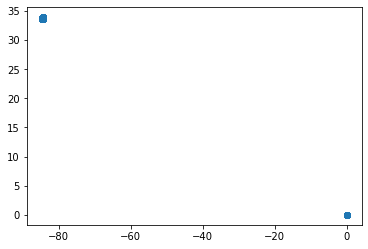

In [27]:
plt.scatter(crime2020['long'], crime2020['lat'])